In [1]:
from ml_market.data import fetch_ohlcv, load_sector_data, load_macro_data
from ml_market.features import compute_all_features
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [2]:
TICKERS = ["AAPL", "MSFT", "AMZN", "GOOGL", "META"]
START = "2020-01-01"
END = "2025-01-01"

In [3]:
stocks_df = fetch_ohlcv(TICKERS, START, END)
sector_df = load_sector_data(start=START, end=END)
macro_df = load_macro_data(start=START, end=END)
display(stocks_df)
display(sector_df)
display(macro_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,date,ticker,open,high,low,close,volume
0,2020-01-02,AAPL,71.476592,72.528574,71.223252,72.468254,135480400
1,2020-01-02,AMZN,93.750000,94.900497,93.207497,94.900497,80580000
2,2020-01-02,GOOGL,66.958679,67.965233,66.863336,67.965233,27278000
3,2020-01-02,META,205.483241,208.504608,205.006186,208.494675,12077100
4,2020-01-02,MSFT,150.758634,152.610120,150.331371,152.505676,22622100
...,...,...,...,...,...,...,...
6285,2024-12-31,AAPL,251.303420,252.139635,248.306963,249.292511,39480700
6286,2024-12-31,AMZN,222.970001,223.229996,218.940002,219.389999,24819700
6287,2024-12-31,GOOGL,190.459059,191.336205,187.897404,188.684845,17466900
6288,2024-12-31,META,590.889825,592.585815,582.489403,584.145569,6019500


,date,close,xlk_ret_1d,xlk_vol_20,xlk_mom_10
0,2020-01-02,88.833038,NaN,NaN,NaN
1,2020-01-03,87.834282,-0.011243,NaN,NaN
2,2020-01-06,88.043533,0.002382,NaN,NaN
3,2020-01-07,88.005501,-0.000432,NaN,NaN
4,2020-01-08,88.947205,0.010701,NaN,NaN
...,...,...,...,...,...
1253,2024-12-24,239.403473,0.010333,0.012215,0.021081
1254,2024-12-26,239.562714,0.000665,0.012191,0.007162
1255,2024-12-27,236.377701,-0.013295,0.012174,-0.000634
1256,2024-12-30,233.371857,-0.012716,0.012417,-0.017552


,date,spy_close,spy_ret_1d,spy_vol_20,spy_mom_10,qqq_close,qqq_ret_1d,qqq_vol_20,qqq_mom_10,tlt_close,...,tlt_vol_20,tlt_mom_10,dxy_close,dxy_ret_1d,dxy_vol_20,dxy_mom_10,vix_close,vix_ret_1d,vix_vol_20,vix_mom_10
0,2020-01-02,298.578644,NaN,NaN,NaN,208.848953,NaN,NaN,NaN,115.892982,...,NaN,NaN,96.849998,NaN,NaN,NaN,12.47,NaN,NaN,NaN
1,2020-01-03,296.317688,-0.007572,NaN,NaN,206.935898,-0.009160,NaN,NaN,117.677788,...,NaN,NaN,96.839996,-0.000103,NaN,NaN,14.02,0.124298,NaN,NaN
2,2020-01-06,297.448242,0.003815,NaN,NaN,208.269272,0.006443,NaN,NaN,117.009567,...,NaN,NaN,96.669998,-0.001755,NaN,NaN,13.85,-0.012126,NaN,NaN
3,2020-01-07,296.611847,-0.002812,NaN,NaN,208.240265,-0.000139,NaN,NaN,116.434349,...,NaN,NaN,96.980003,0.003207,NaN,NaN,13.79,-0.004332,NaN,NaN
4,2020-01-08,298.192688,0.005330,NaN,NaN,209.805466,0.007516,NaN,NaN,115.664650,...,NaN,NaN,97.300003,0.003300,NaN,NaN,13.45,-0.024656,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-12-24,596.076965,0.011115,0.008789,0.000869,527.965210,0.013560,0.012176,0.019621,84.453339,...,0.008111,-0.052303,108.260002,0.002036,0.004453,0.017481,14.27,-0.149583,0.189167,0.006347
1254,2024-12-26,596.116699,0.000067,0.008719,-0.006743,527.606567,-0.000679,0.012173,0.001008,84.405281,...,0.008110,-0.043802,108.129997,-0.001201,0.004464,0.013307,14.73,0.032235,0.188897,0.084683
1255,2024-12-27,589.841614,-0.010527,0.009024,-0.012108,520.593018,-0.013293,0.012464,-0.005883,83.713264,...,0.007925,-0.039980,108.000000,-0.001202,0.003932,0.009723,15.95,0.082824,0.189453,0.145833
1256,2024-12-30,583.110596,-0.011412,0.009232,-0.023188,513.669189,-0.013300,0.012790,-0.026556,84.386070,...,0.007739,-0.022281,108.129997,0.001204,0.003811,0.010561,17.40,0.090909,0.189521,0.259956


In [4]:
df = compute_all_features(stocks_df, sector_df, macro_df)
df = df.sort_values(["date", "ticker"]).reset_index(drop=True)
display(df)

,date,ticker,open,high,low,close_x,volume,ret1d,ret5d,ret10d,...,vix_close,vix_ret_1d,vix_vol_20,vix_mom_10,stock_vs_sector,stock_vs_spy,qqq_vs_spy,regime_vol,regime_trend,regime_momentum
0,2020-10-15,AAPL,115.369223,117.779223,114.815311,117.303055,112559200,-0.003961,0.049926,0.033564,...,26.969999,0.021591,0.041301,0.010112,0.000546,-0.002725,-0.005475,high,neutral,neutral
1,2020-10-15,AMZN,164.600494,167.794006,164.000000,166.932495,104468000,-0.007450,0.046418,0.036442,...,26.969999,0.021591,0.041301,0.010112,-0.002943,-0.006214,-0.005475,high,neutral,neutral
2,2020-10-15,GOOGL,76.696010,78.031798,76.528669,77.240753,31210000,-0.005098,0.048563,0.045413,...,26.969999,0.021591,0.041301,0.010112,-0.000591,-0.003862,-0.005475,high,neutral,neutral
3,2020-10-15,META,265.960429,267.391608,262.054515,265.085815,15416100,-0.018762,0.011222,0.000337,...,26.969999,0.021591,0.041301,0.010112,-0.014255,-0.017526,-0.005475,high,neutral,neutral
4,2020-10-15,MSFT,207.772162,210.892089,206.728984,210.222168,22733100,-0.005433,0.043119,0.033889,...,26.969999,0.021591,0.041301,0.010112,-0.000926,-0.004197,-0.005475,high,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,2024-12-27,AAPL,256.669129,257.535238,251.920617,254.439224,42355300,-0.013242,0.023219,0.030771,...,15.950000,0.082824,0.189453,0.145833,0.000053,-0.002716,-0.002767,low,up,neutral
5281,2024-12-27,AMZN,225.600006,226.029999,220.899994,223.750000,27367100,-0.014534,0.002060,-0.022798,...,15.950000,0.082824,0.189453,0.145833,-0.001239,-0.004008,-0.002767,low,up,neutral
5282,2024-12-27,GOOGL,194.316476,194.685284,190.030447,192.133591,18891400,-0.014519,0.022545,0.004167,...,15.950000,0.082824,0.189453,0.145833,-0.001224,-0.003993,-0.002767,low,up,neutral
5283,2024-12-27,META,598.013078,600.447394,588.425488,598.412170,8084200,-0.005867,0.007119,-0.048346,...,15.950000,0.082824,0.189453,0.145833,0.007428,0.004659,-0.002767,low,up,neutral


In [5]:
df.to_csv("../data/full.csv", index=False)
stocks_df.to_csv("../data/stocks.csv", index=False)
sector_df.to_csv("../data/sector.csv", index=False)
macro_df.to_csv("../data/macro.csv", index=False)

In [6]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# All features
ALL_FEATURES = [
    #'ticker',
    'ret1d', 'ret5d', 'ret10d', 'ret20d', 'logret', 
    'ret_lag_1', 'close_lag_1', 'ret_lag_2', 'close_lag_2', 'ret_lag_3', 
    'close_lag_3', 'ret_lag_5', 'close_lag_5', 'ret_lag_7', 'close_lag_7', 
    'ret_lag_10', 'close_lag_10', 'ret_mean_5', 'ret_std_5', 'ret_std_20', 
    'ret_vol_ratio_5_20', 'ret_autocorr_5', 'sma_5', 'sma_10', 'sma_20', 
    'sma_50', 'sma_200', 'ema_10', 'ema_20', 'ema_50', 'sma_5_20_diff', 
    'sma_10_50_diff', 'macd', 'macd_signal', 'macd_hist', 'price_to_sma20', 
    'price_to_sma50', 'roc_10', 'roc_20', 'rsi_14', 'stoch_k', 'stoch_d', 
    'williams_r', 'truerange', 'atr_14', 'atr_pct', 'bb_middle', 'bb_upper', 
    'bb_lower', 'boll_width', 'bb_position', 'vol20', 'volume_change', 
    'volume_ma_20', 'volume_ratio', 'volume_trend_5', 'typical_price', 
    'vwap', 'vwap_dev', 'day_of_week', 'month', 'week_of_year', 
    'is_month_start', 'is_month_end', 'is_monday', 'is_friday', 
    'days_to_month_end', 'xlk_ret_1d', 'xlk_vol_20', 'xlk_mom_10', 
    'spy_ret_1d', 'spy_vol_20', 'spy_mom_10', 'qqq_ret_1d', 'qqq_vol_20', 
    'qqq_mom_10', 'tlt_ret_1d', 'tlt_vol_20', 'tlt_mom_10', 'dxy_ret_1d', 
    'dxy_vol_20', 'dxy_mom_10', 'vix_ret_1d', 'vix_vol_20', 'vix_mom_10', 
    'stock_vs_sector', 'stock_vs_spy', 'qqq_vs_spy', 
    #'regime_vol', 'regime_trend', 'regime_momentum'
]

SUSPECT = ['ret1d', 'ret5d', 'ret10d', 'ret20d', 'logret', 'ret_mean_5', 'roc_10', 'roc_20']
CLEAN_FEATURES = [f for f in ALL_FEATURES if f not in SUSPECT]

# All targets to test
TARGETS = ['target_ret_1d', 'target_ret_5d', 'target_ret_10d']

def quick_test(features, target, name="Model"):
    available = [f for f in features if f in df.columns]
    X = df[available].fillna(0)
    y = df[target].dropna()
    X = X.loc[y.index]  # Align indices
    
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    
    corr = np.corrcoef(y_test, pred)[0,1]
    dir_acc = (np.sign(pred) == np.sign(y_test)).mean()
    
    importances = sorted(zip(available, rf.feature_importances_), key=lambda x: -x[1])
    
    return corr, dir_acc, importances

# Run all targets
print("\n" + "=" * 70)
print("RANDOM FOREST: ALL TARGETS COMPARISON")
print("=" * 70)

results = []

for target in TARGETS:
    print(f"\n{'─' * 70}")
    print(f"TARGET: {target}")
    print(f"{'─' * 70}")
    
    # Clean features
    corr_clean, dir_clean, imp_clean = quick_test(CLEAN_FEATURES, target, "Clean")
    
    # With suspects
    corr_all, dir_all, imp_all = quick_test(ALL_FEATURES, target, "All")
    
    results.append({
        'target': target,
        'corr_clean': corr_clean,
        'corr_all': corr_all,
        'dir_clean': dir_clean,
        'dir_all': dir_all,
        'diff_corr': corr_all - corr_clean,
        'diff_dir': dir_all - dir_clean,
    })
    
    # Print metrics
    print(f"\nWithout Suspects: Corr={corr_clean:.3f}, Dir={dir_clean:.1%}")
    print(f"With Suspects:    Corr={corr_all:.3f}, Dir={dir_all:.1%}")
    print(f"Difference:       Corr={corr_all - corr_clean:+.3f}, Dir={dir_all - dir_clean:+.1%}")
    
    if corr_all - corr_clean > 0.05:
        print("!!! Large difference - suspect features likely leaking !!!")
    
    # Top 10 features (clean)
    print(f"\nTop 10 Features (Clean):")
    for i, (feat, imp) in enumerate(imp_clean[:10], 1):
        print(f"  {i:2d}. {feat:<25} {imp:.4f}")

# Summary table
print(f"\n{'=' * 70}")
print("SUMMARY TABLE")
print(f"{'=' * 70}")
print(f"\n{'Target':<18} {'Clean':<12} {'Suspects':<12} {'Diff':>8}")
print(f"{'':<18} {'Corr | Dir':<12} {'Corr | Dir':<12} {'Corr':>8}")
print("─" * 70)

for r in results:
    print(f"{r['target']:<18} {r['corr_clean']:.3f} | {r['dir_clean']:.1%}  "
          f"{r['corr_all']:.3f} | {r['dir_all']:.1%}  {r['diff_corr']:>+.3f}")

print("=" * 70)
"""
just quick test running on most features calculated, suspect features variable just to test performance without them
commented out ticker and regime stuff since its categorical, might be able to encode if it helps but for now just leaving out
ran without ohlcv data so model can learn the patterns not the numbers/scale
"""


RANDOM FOREST: ALL TARGETS COMPARISON

──────────────────────────────────────────────────────────────────────
TARGET: target_ret_1d
──────────────────────────────────────────────────────────────────────

Without Suspects: Corr=0.480, Dir=65.4%
With Suspects:    Corr=0.483, Dir=65.0%
Difference:       Corr=+0.003, Dir=-0.4%

Top 10 Features (Clean):
   1. qqq_ret_1d                0.4886
   2. bb_lower                  0.0477
   3. ret_lag_1                 0.0401
   4. xlk_ret_1d                0.0175
   5. volume_ma_20              0.0167
   6. volume_change             0.0158
   7. stock_vs_spy              0.0114
   8. ret_lag_2                 0.0111
   9. qqq_vs_spy                0.0109
  10. ret_lag_10                0.0105

──────────────────────────────────────────────────────────────────────
TARGET: target_ret_5d
──────────────────────────────────────────────────────────────────────

Without Suspects: Corr=0.822, Dir=83.2%
With Suspects:    Corr=0.777, Dir=81.9%
Difference: 

'\njust quick test running on most features calculated, suspect features variable just to test performance without them\ncommented out ticker and regime stuff since its categorical, might be able to encode if it helps but for now just leaving out\nran without ohlcv data so model can learn the patterns not the numbers/scale\n'

In [7]:
# =============================================================================
# RANDOM FOREST - FULL IMPLEMENTATION
# =============================================================================

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt

# Encode categorical columns
categorical_cols = ['ticker', 'regime_vol', 'regime_trend', 'regime_momentum']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_encoded = df.copy()
df_encoded[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Define features (excluding targets and date)
target_cols = ['target_ret_1d', 'target_ret_5d', 'target_ret_10d']
exclude_cols = ['date', 'close_x', 'close_y'] + target_cols
feature_cols = [c for c in df_encoded.columns if c not in exclude_cols]

print(f"Total features: {len(feature_cols)}")
print(f"Dataset shape: {df_encoded.shape}")

Total features: 103
Dataset shape: (5285, 109)


In [8]:
# =============================================================================
# TIME-SERIES TRAIN/TEST SPLIT
# =============================================================================

TARGET = 'target_ret_5d'  # Change this to test different targets

# Prepare data
df_model = df_encoded.dropna(subset=[TARGET])
X = df_model[feature_cols].fillna(0)
y = df_model[TARGET]

# Time-based split (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Train date range: {df_model['date'].iloc[:split_idx].min()} to {df_model['date'].iloc[:split_idx].max()}")
print(f"Test date range: {df_model['date'].iloc[split_idx:].min()} to {df_model['date'].iloc[split_idx:].max()}")

Training samples: 4228
Test samples: 1057
Train date range: 2020-10-15 00:00:00 to 2024-02-27 00:00:00
Test date range: 2024-02-27 00:00:00 to 2024-12-27 00:00:00


In [9]:
# =============================================================================
# TRAIN RANDOM FOREST REGRESSOR
# =============================================================================

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Training complete!")

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Training complete!


[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished


In [10]:
# =============================================================================
# MODEL EVALUATION
# =============================================================================

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Regression Metrics
print("=" * 60)
print("REGRESSION METRICS")
print("=" * 60)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n{'Metric':<20} {'Train':<15} {'Test':<15}")
print("-" * 50)
print(f"{'MSE':<20} {train_mse:<15.6f} {test_mse:<15.6f}")
print(f"{'RMSE':<20} {np.sqrt(train_mse):<15.6f} {np.sqrt(test_mse):<15.6f}")
print(f"{'MAE':<20} {train_mae:<15.6f} {test_mae:<15.6f}")
print(f"{'R²':<20} {train_r2:<15.4f} {test_r2:<15.4f}")

# Correlation
train_corr = np.corrcoef(y_train, y_train_pred)[0, 1]
test_corr = np.corrcoef(y_test, y_test_pred)[0, 1]
print(f"{'Correlation':<20} {train_corr:<15.4f} {test_corr:<15.4f}")

# Directional Accuracy (key for trading)
train_dir_acc = (np.sign(y_train_pred) == np.sign(y_train)).mean()
test_dir_acc = (np.sign(y_test_pred) == np.sign(y_test)).mean()
print(f"{'Directional Acc':<20} {train_dir_acc:<15.2%} {test_dir_acc:<15.2%}")

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.0s finished


REGRESSION METRICS

Metric               Train           Test           
--------------------------------------------------
MSE                  0.000337        0.000435       
RMSE                 0.018359        0.020852       
MAE                  0.011988        0.015510       
R²                   0.8501          0.6618         
Correlation          0.9347          0.8176         
Directional Acc      89.66%          83.16%         


TOP 20 FEATURE IMPORTANCES
       feature  importance
         ret5d    0.129789
    ret_mean_5    0.128151
       stoch_k    0.053455
   bb_position    0.051733
price_to_sma20    0.044339
    williams_r    0.043645
      vwap_dev    0.035149
     ret_lag_3    0.026269
        roc_10    0.026054
     ret_lag_2    0.022678
        rsi_14    0.022547
     ret_lag_1    0.021031
         ret1d    0.020302
       stoch_d    0.017499
     ret_std_5    0.017378
        ret10d    0.015484
 sma_5_20_diff    0.013550
        logret    0.012438
     macd_hist    0.011190
       atr_pct    0.009611


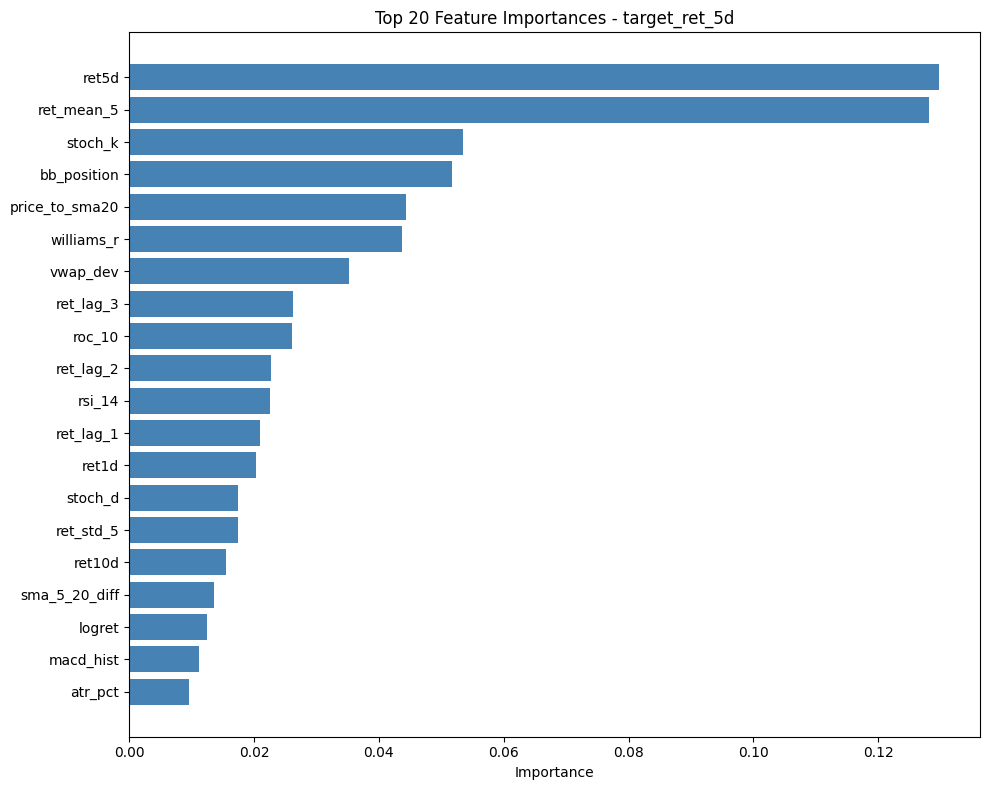

In [11]:
# =============================================================================
# FEATURE IMPORTANCE
# =============================================================================

# Get feature importances
importances = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 20
print("=" * 60)
print("TOP 20 FEATURE IMPORTANCES")
print("=" * 60)
print(importances.head(20).to_string(index=False))

# Plot top 20 features
fig, ax = plt.subplots(figsize=(10, 8))
top_20 = importances.head(20)
ax.barh(range(len(top_20)), top_20['importance'].values, color='steelblue')
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title(f'Top 20 Feature Importances - {TARGET}')
plt.tight_layout()
plt.show()

In [12]:
# =============================================================================
# TIME-SERIES CROSS-VALIDATION
# =============================================================================

tscv = TimeSeriesSplit(n_splits=5)

cv_scores = {
    'rmse': [],
    'mae': [],
    'corr': [],
    'dir_acc': []
}

print("=" * 60)
print("TIME-SERIES CROSS-VALIDATION (5 folds)")
print("=" * 60)

for fold, (train_idx, val_idx) in enumerate(tscv.split(X), 1):
    X_cv_train, X_cv_val = X.iloc[train_idx], X.iloc[val_idx]
    y_cv_train, y_cv_val = y.iloc[train_idx], y.iloc[val_idx]
    
    rf_cv = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        n_jobs=-1,
        random_state=42
    )
    rf_cv.fit(X_cv_train, y_cv_train)
    y_cv_pred = rf_cv.predict(X_cv_val)
    
    rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
    mae = mean_absolute_error(y_cv_val, y_cv_pred)
    corr = np.corrcoef(y_cv_val, y_cv_pred)[0, 1]
    dir_acc = (np.sign(y_cv_pred) == np.sign(y_cv_val)).mean()
    
    cv_scores['rmse'].append(rmse)
    cv_scores['mae'].append(mae)
    cv_scores['corr'].append(corr)
    cv_scores['dir_acc'].append(dir_acc)
    
    print(f"Fold {fold}: RMSE={rmse:.4f}, MAE={mae:.4f}, Corr={corr:.3f}, Dir Acc={dir_acc:.1%}")

print("\n" + "-" * 60)
print(f"Mean RMSE:    {np.mean(cv_scores['rmse']):.4f} (+/- {np.std(cv_scores['rmse']):.4f})")
print(f"Mean MAE:     {np.mean(cv_scores['mae']):.4f} (+/- {np.std(cv_scores['mae']):.4f})")
print(f"Mean Corr:    {np.mean(cv_scores['corr']):.3f} (+/- {np.std(cv_scores['corr']):.3f})")
print(f"Mean Dir Acc: {np.mean(cv_scores['dir_acc']):.1%} (+/- {np.std(cv_scores['dir_acc']):.1%})")

TIME-SERIES CROSS-VALIDATION (5 folds)


Fold 1: RMSE=0.0301, MAE=0.0190, Corr=0.715, Dir Acc=80.1%
Fold 2: RMSE=0.0419, MAE=0.0307, Corr=0.777, Dir Acc=84.3%
Fold 3: RMSE=0.0280, MAE=0.0201, Corr=0.789, Dir Acc=81.1%
Fold 4: RMSE=0.0209, MAE=0.0150, Corr=0.808, Dir Acc=83.2%
Fold 5: RMSE=0.0204, MAE=0.0152, Corr=0.837, Dir Acc=84.3%

------------------------------------------------------------
Mean RMSE:    0.0283 (+/- 0.0078)
Mean MAE:     0.0200 (+/- 0.0057)
Mean Corr:    0.785 (+/- 0.040)
Mean Dir Acc: 82.6% (+/- 1.7%)


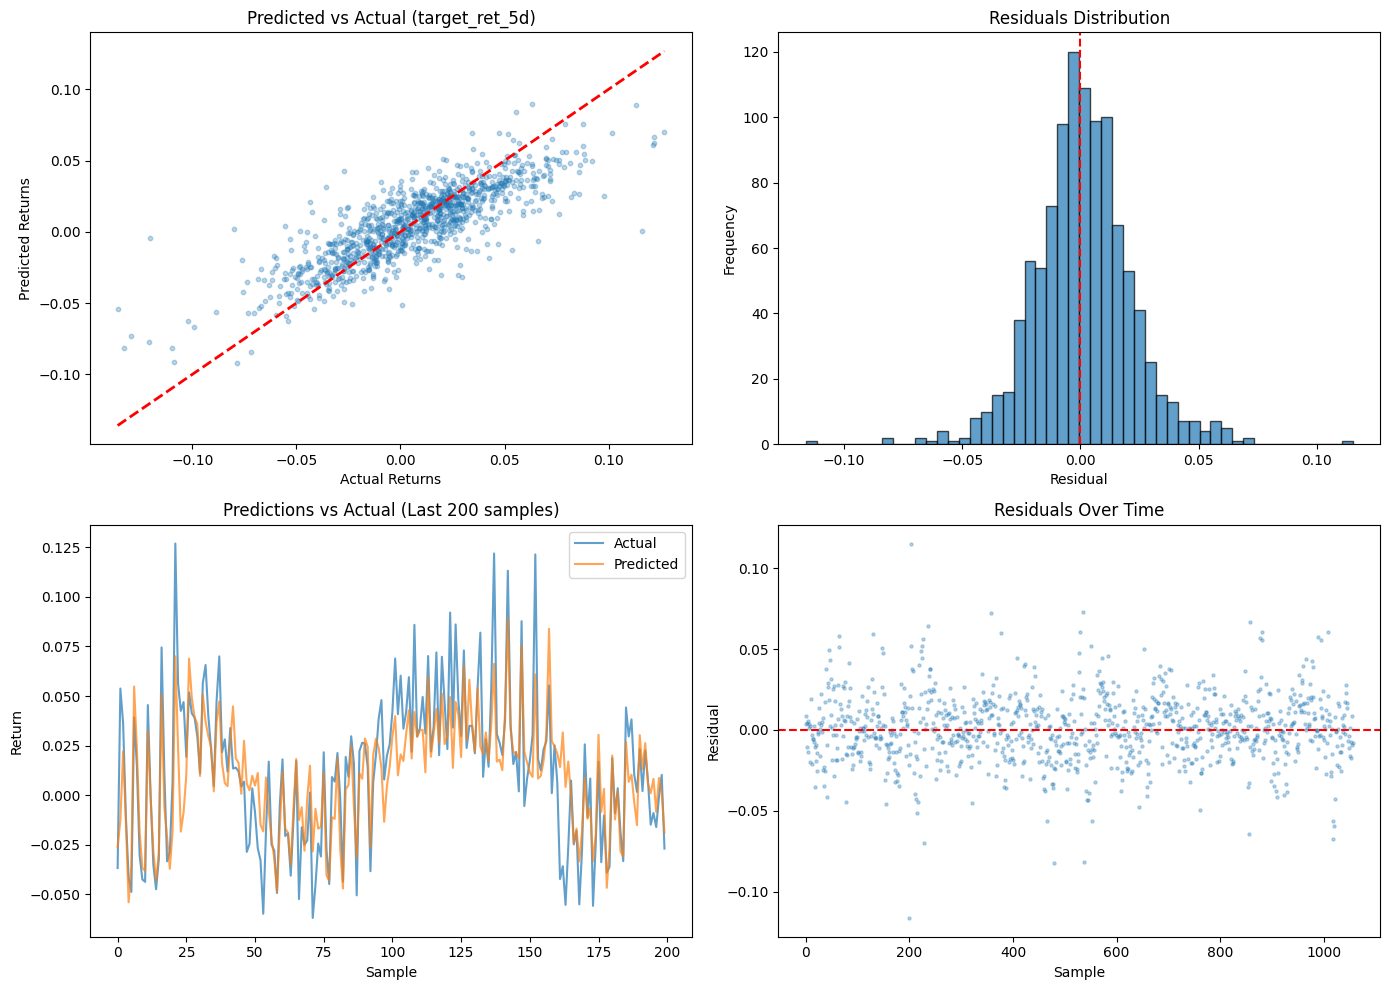

In [13]:
# =============================================================================
# PREDICTION VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual scatter
ax1 = axes[0, 0]
ax1.scatter(y_test, y_test_pred, alpha=0.3, s=10)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Returns')
ax1.set_ylabel('Predicted Returns')
ax1.set_title(f'Predicted vs Actual ({TARGET})')

# 2. Residuals distribution
ax2 = axes[0, 1]
residuals = y_test - y_test_pred
ax2.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='r', linestyle='--')
ax2.set_xlabel('Residual')
ax2.set_ylabel('Frequency')
ax2.set_title('Residuals Distribution')

# 3. Predictions over time (last 200 samples)
ax3 = axes[1, 0]
test_dates = df_model['date'].iloc[split_idx:].values[-200:]
ax3.plot(range(len(test_dates)), y_test.values[-200:], label='Actual', alpha=0.7)
ax3.plot(range(len(test_dates)), y_test_pred[-200:], label='Predicted', alpha=0.7)
ax3.set_xlabel('Sample')
ax3.set_ylabel('Return')
ax3.set_title('Predictions vs Actual (Last 200 samples)')
ax3.legend()

# 4. Residuals over time
ax4 = axes[1, 1]
ax4.scatter(range(len(y_test)), residuals, alpha=0.3, s=5)
ax4.axhline(y=0, color='r', linestyle='--')
ax4.set_xlabel('Sample')
ax4.set_ylabel('Residual')
ax4.set_title('Residuals Over Time')

plt.tight_layout()
plt.show()

In [14]:
# =============================================================================
# HYPERPARAMETER TUNING (RandomizedSearchCV)
# =============================================================================

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5],
}

# Use TimeSeriesSplit for cross-validation
tscv_tune = TimeSeriesSplit(n_splits=3)

rf_search = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=tscv_tune,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Running hyperparameter search...")
rf_search.fit(X_train, y_train)

print("\n" + "=" * 60)
print("BEST PARAMETERS")
print("=" * 60)
for param, value in rf_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score (neg MSE): {rf_search.best_score_:.6f}")

Running hyperparameter search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

BEST PARAMETERS
  n_estimators: 100
  min_samples_split: 10
  min_samples_leaf: 1
  max_features: 0.5
  max_depth: 15

Best CV Score (neg MSE): -0.001023


In [15]:
# =============================================================================
# EVALUATE BEST MODEL
# =============================================================================

best_rf = rf_search.best_estimator_
y_best_pred = best_rf.predict(X_test)

print("=" * 60)
print("BEST MODEL PERFORMANCE ON TEST SET")
print("=" * 60)

best_mse = mean_squared_error(y_test, y_best_pred)
best_mae = mean_absolute_error(y_test, y_best_pred)
best_r2 = r2_score(y_test, y_best_pred)
best_corr = np.corrcoef(y_test, y_best_pred)[0, 1]
best_dir_acc = (np.sign(y_best_pred) == np.sign(y_test)).mean()

print(f"\nMSE:             {best_mse:.6f}")
print(f"RMSE:            {np.sqrt(best_mse):.6f}")
print(f"MAE:             {best_mae:.6f}")
print(f"R²:              {best_r2:.4f}")
print(f"Correlation:     {best_corr:.4f}")
print(f"Directional Acc: {best_dir_acc:.2%}")

# Compare with baseline model
print("\n" + "-" * 60)
print("IMPROVEMENT OVER BASELINE MODEL")
print("-" * 60)
print(f"RMSE:   {np.sqrt(test_mse):.4f} -> {np.sqrt(best_mse):.4f} ({(np.sqrt(best_mse)/np.sqrt(test_mse) - 1)*100:+.1f}%)")
print(f"Corr:   {test_corr:.4f} -> {best_corr:.4f} ({(best_corr/test_corr - 1)*100:+.1f}%)")
print(f"Dir:    {test_dir_acc:.2%} -> {best_dir_acc:.2%} ({(best_dir_acc - test_dir_acc)*100:+.1f}pp)")

BEST MODEL PERFORMANCE ON TEST SET

MSE:             0.000473
RMSE:            0.021755
MAE:             0.015725
R²:              0.6319
Correlation:     0.7988
Directional Acc: 83.25%

------------------------------------------------------------
IMPROVEMENT OVER BASELINE MODEL
------------------------------------------------------------
RMSE:   0.0209 -> 0.0218 (+4.3%)
Corr:   0.8176 -> 0.7988 (-2.3%)
Dir:    83.16% -> 83.25% (+0.1pp)


In [16]:
# =============================================================================
# RANDOM FOREST CLASSIFIER (Direction Prediction)
# =============================================================================

# Convert to classification: 1 = positive return, 0 = negative return
y_train_class = (y_train > 0).astype(int)
y_test_class = (y_test > 0).astype(int)

rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42
)

print("Training Random Forest Classifier...")
rf_classifier.fit(X_train, y_train_class)

# Predictions
y_train_class_pred = rf_classifier.predict(X_train)
y_test_class_pred = rf_classifier.predict(X_test)
y_test_proba = rf_classifier.predict_proba(X_test)[:, 1]

print("\n" + "=" * 60)
print("CLASSIFICATION METRICS")
print("=" * 60)

print(f"\n{'Metric':<20} {'Train':<15} {'Test':<15}")
print("-" * 50)
print(f"{'Accuracy':<20} {accuracy_score(y_train_class, y_train_class_pred):<15.2%} {accuracy_score(y_test_class, y_test_class_pred):<15.2%}")
print(f"{'Precision':<20} {precision_score(y_train_class, y_train_class_pred):<15.2%} {precision_score(y_test_class, y_test_class_pred):<15.2%}")
print(f"{'Recall':<20} {recall_score(y_train_class, y_train_class_pred):<15.2%} {recall_score(y_test_class, y_test_class_pred):<15.2%}")
print(f"{'F1 Score':<20} {f1_score(y_train_class, y_train_class_pred):<15.2%} {f1_score(y_test_class, y_test_class_pred):<15.2%}")

# Class distribution
print(f"\n{'Class Distribution':<20}")
print(f"Train - Positive: {y_train_class.sum()}/{len(y_train_class)} ({y_train_class.mean():.1%})")
print(f"Test  - Positive: {y_test_class.sum()}/{len(y_test_class)} ({y_test_class.mean():.1%})")

Training Random Forest Classifier...

CLASSIFICATION METRICS

Metric               Train           Test           
--------------------------------------------------
Accuracy             94.94%          83.54%         
Precision            94.89%          84.77%         
Recall               95.88%          87.52%         
F1 Score             95.38%          86.12%         

Class Distribution  
Train - Positive: 2305/4228 (54.5%)
Test  - Positive: 617/1057 (58.4%)


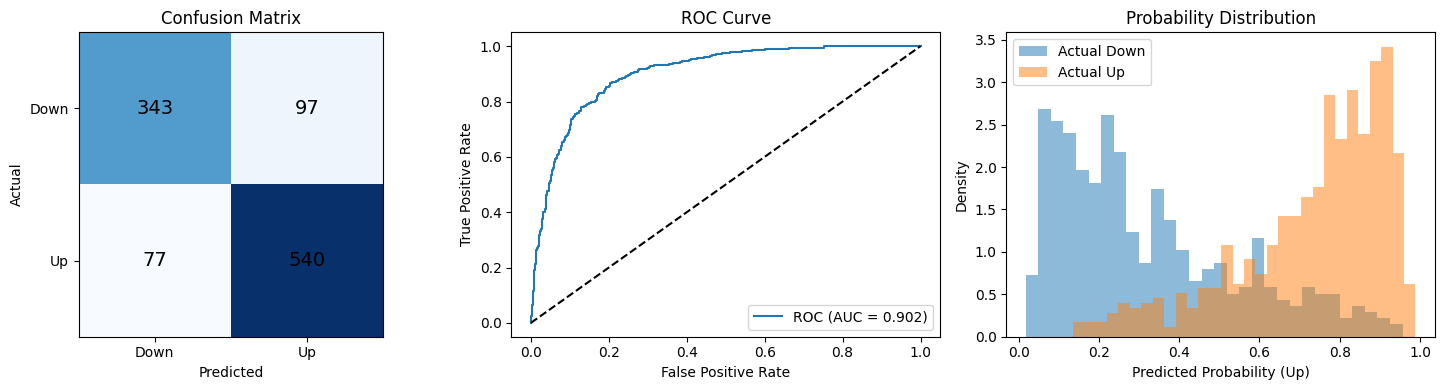


ROC AUC Score: 0.9023


In [17]:
# =============================================================================
# CLASSIFIER VISUALIZATION
# =============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Confusion Matrix
ax1 = axes[0]
cm = confusion_matrix(y_test_class, y_test_class_pred)
im = ax1.imshow(cm, cmap='Blues')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Down', 'Up'])
ax1.set_yticklabels(['Down', 'Up'])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm[i, j], ha='center', va='center', fontsize=14)

# 2. ROC Curve
ax2 = axes[1]
fpr, tpr, _ = roc_curve(y_test_class, y_test_proba)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

# 3. Probability Distribution
ax3 = axes[2]
ax3.hist(y_test_proba[y_test_class == 0], bins=30, alpha=0.5, label='Actual Down', density=True)
ax3.hist(y_test_proba[y_test_class == 1], bins=30, alpha=0.5, label='Actual Up', density=True)
ax3.set_xlabel('Predicted Probability (Up)')
ax3.set_ylabel('Density')
ax3.set_title('Probability Distribution')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

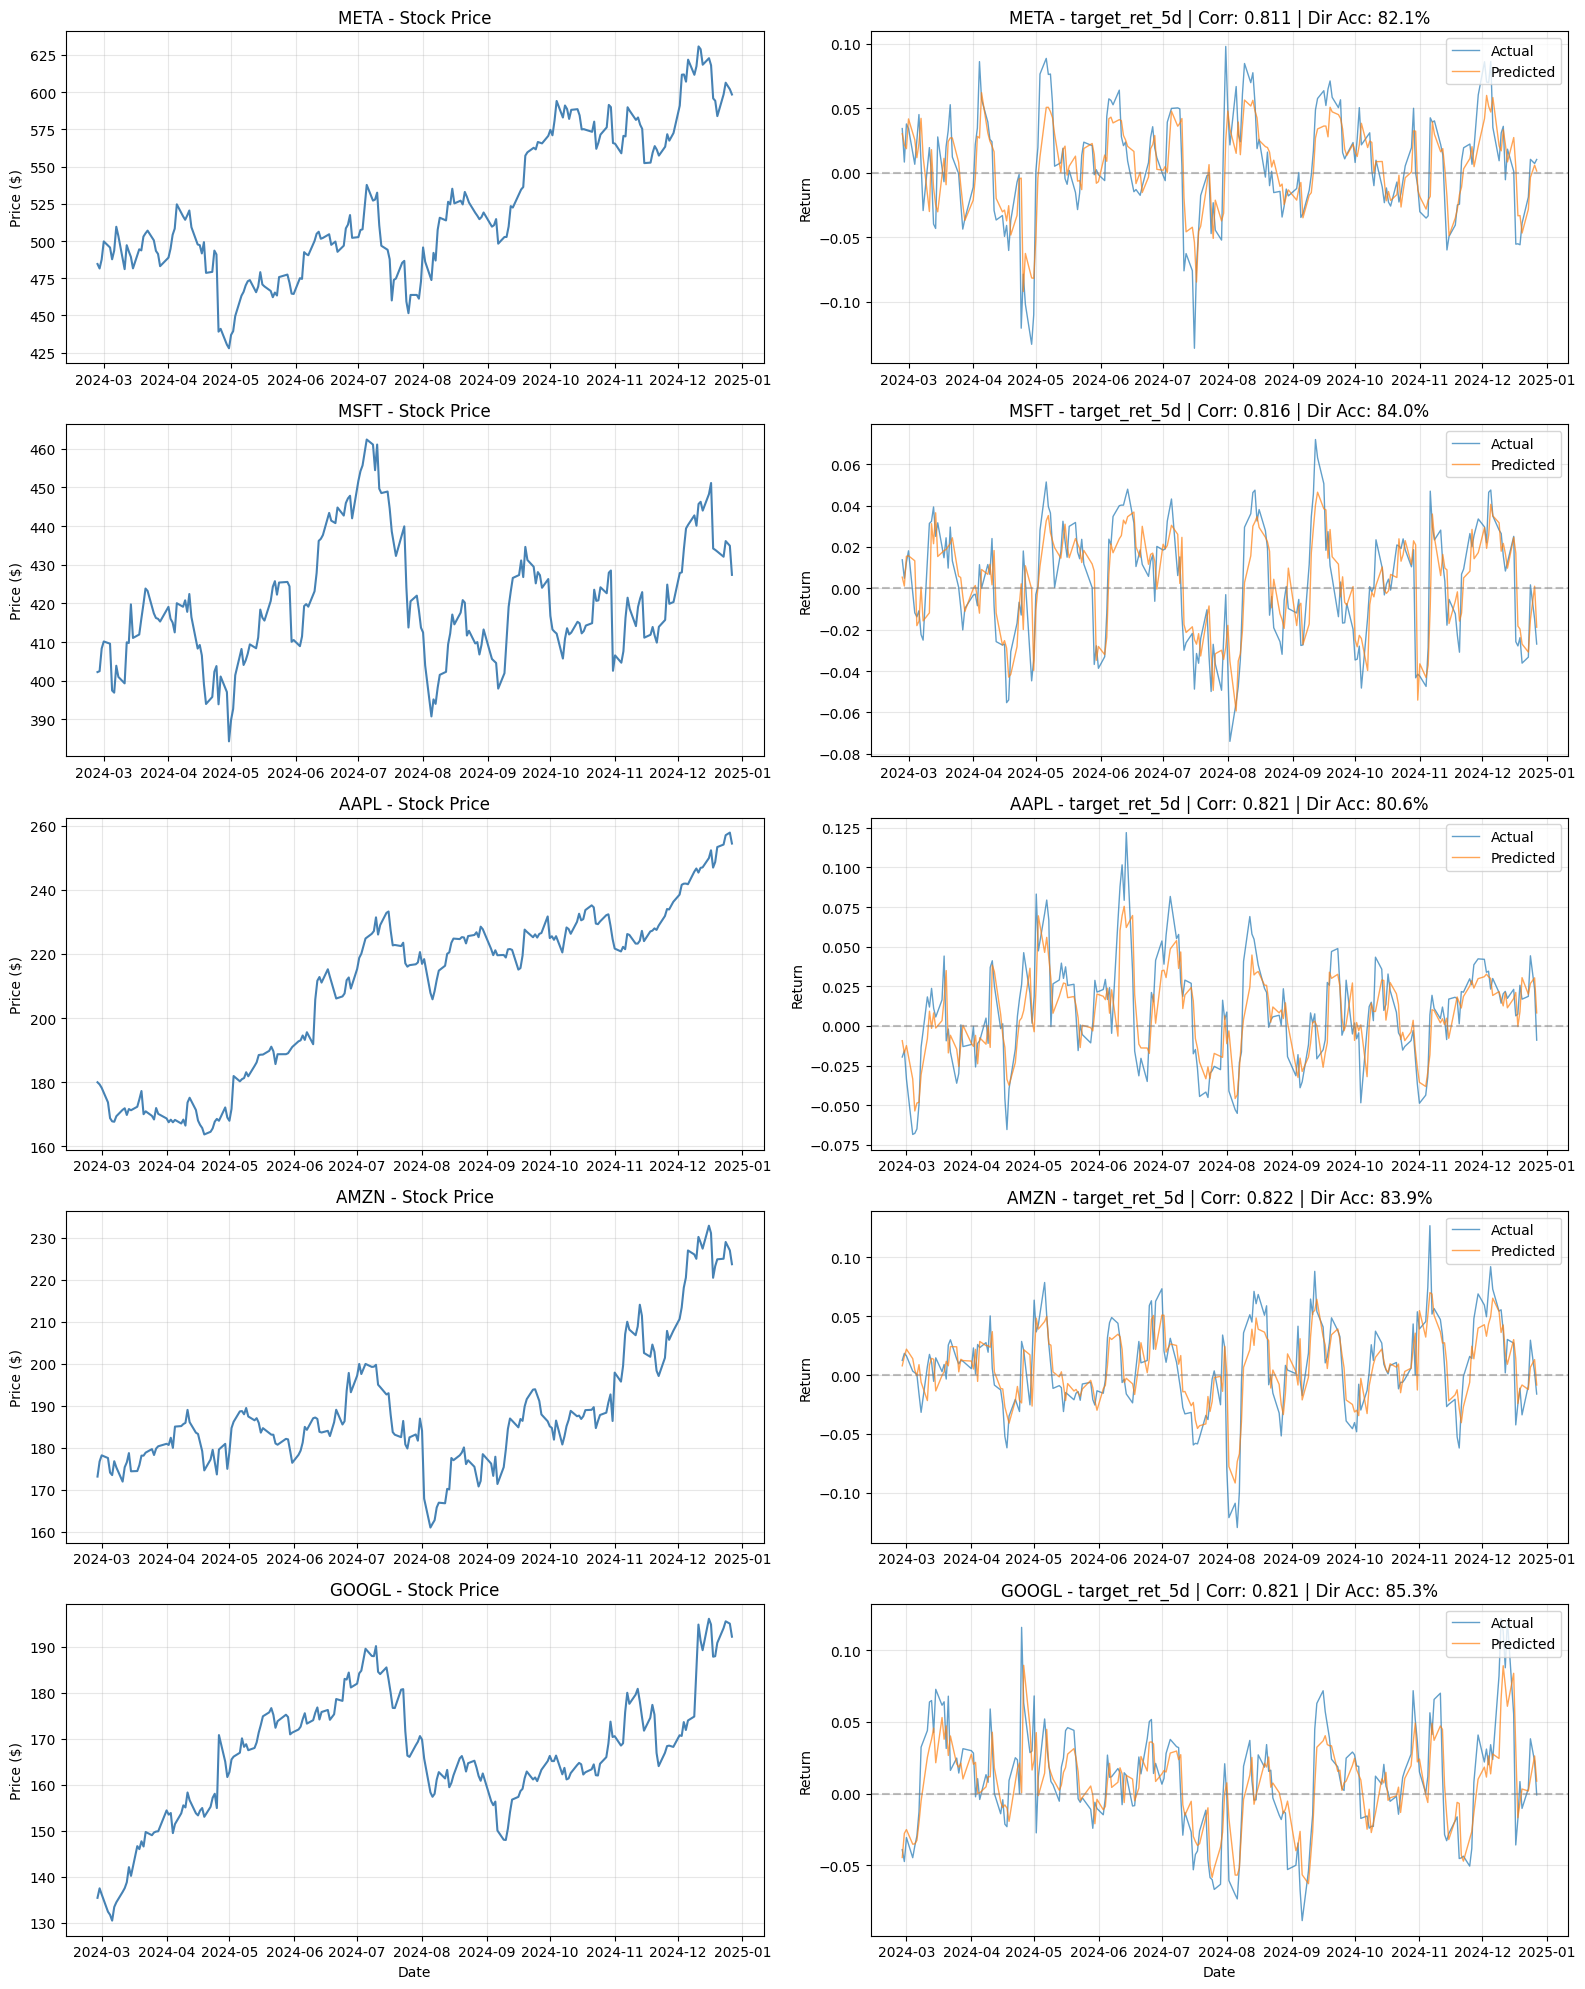

In [18]:
# =============================================================================
# INDIVIDUAL STOCK PREDICTIONS OVER TIME
# =============================================================================

# Get test set data with predictions
test_df = df_model.iloc[split_idx:].copy()
test_df['prediction'] = y_test_pred
test_df['actual'] = y_test.values

# Map encoded ticker back to name
ticker_map = dict(zip(range(len(TICKERS)), sorted(TICKERS)))

# Get unique tickers
tickers = test_df['ticker'].unique()

fig, axes = plt.subplots(len(tickers), 2, figsize=(16, 4 * len(tickers)))

for i, ticker_enc in enumerate(tickers):
    ticker_name = ticker_map.get(int(ticker_enc), f"Ticker {int(ticker_enc)}")
    ticker_data = test_df[test_df['ticker'] == ticker_enc].copy()
    
    # Left plot: Stock price over time
    ax1 = axes[i, 0]
    ax1.plot(ticker_data['date'], ticker_data['close_x'], color='steelblue', linewidth=1.5)
    ax1.set_title(f'{ticker_name} - Stock Price')
    ax1.set_ylabel('Price ($)')
    ax1.grid(True, alpha=0.3)
    
    # Right plot: Actual vs predicted returns
    ax2 = axes[i, 1]
    ax2.plot(ticker_data['date'], ticker_data['actual'], label='Actual', alpha=0.7, linewidth=1)
    ax2.plot(ticker_data['date'], ticker_data['prediction'], label='Predicted', alpha=0.7, linewidth=1)
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    
    # Calculate metrics for this ticker
    corr = np.corrcoef(ticker_data['actual'], ticker_data['prediction'])[0, 1]
    dir_acc = (np.sign(ticker_data['prediction']) == np.sign(ticker_data['actual'])).mean()
    
    ax2.set_title(f'{ticker_name} - {TARGET} | Corr: {corr:.3f} | Dir Acc: {dir_acc:.1%}')
    ax2.set_ylabel('Return')
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)

axes[-1, 0].set_xlabel('Date')
axes[-1, 1].set_xlabel('Date')
plt.tight_layout()
plt.show()

In [19]:
# =============================================================================
# PER-STOCK PERFORMANCE SUMMARY
# =============================================================================

# Map encoded ticker back to name
ticker_map = dict(zip(range(len(TICKERS)), sorted(TICKERS)))

print("=" * 70)
print("PER-STOCK MODEL PERFORMANCE")
print("=" * 70)

summary_data = []

for ticker_enc in test_df['ticker'].unique():
    ticker_data = test_df[test_df['ticker'] == ticker_enc]
    ticker_name = ticker_map.get(int(ticker_enc), f"Ticker {int(ticker_enc)}")
    
    actual = ticker_data['actual']
    pred = ticker_data['prediction']
    
    corr = np.corrcoef(actual, pred)[0, 1]
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    dir_acc = (np.sign(pred) == np.sign(actual)).mean()
    
    summary_data.append({
        'Ticker': ticker_name,
        'Samples': len(ticker_data),
        'Corr': corr,
        'RMSE': rmse,
        'MAE': mae,
        'Dir Acc': dir_acc,
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "-" * 70)
print(f"Average Correlation:      {summary_df['Corr'].mean():.3f}")
print(f"Average RMSE:             {summary_df['RMSE'].mean():.4f}")
print(f"Average MAE:              {summary_df['MAE'].mean():.4f}")
print(f"Average Directional Acc:  {summary_df['Dir Acc'].mean():.1%}")

PER-STOCK MODEL PERFORMANCE
Ticker  Samples     Corr     RMSE      MAE  Dir Acc
  META      212 0.810852 0.024670 0.018459 0.820755
  MSFT      212 0.815791 0.015977 0.012153 0.839623
  AAPL      211 0.821103 0.018705 0.014219 0.805687
  AMZN      211 0.821785 0.022134 0.016954 0.838863
 GOOGL      211 0.820982 0.021687 0.015769 0.853081

----------------------------------------------------------------------
Average Correlation:      0.818
Average RMSE:             0.0206
Average MAE:              0.0155
Average Directional Acc:  83.2%
